In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
in_time = [(0,27),(1,25),(2,16),(3,19),(4,26),(5,20),(6,19),(7,17),(8,10),(9,5),(10,4),(11,4),(12,2)]
cls_late = [(5,3), (6, 5), (7, 8), (8, 15), (9, 17), (10, 18), (11, 19), (12,16), (13, 9), (14, 8), (15, 8)]

In [27]:
# x,y = zip(in_time)
# print(x)
# print(y)
hhhh = (*in_time)

SyntaxError: can't use starred expression here (<ipython-input-27-a49b1b820de8>, line 4)

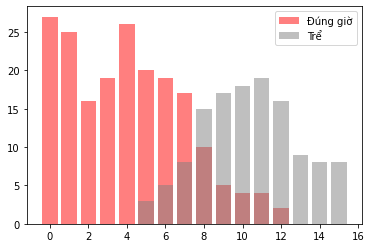

In [3]:
X, Y = zip(*in_time)
X2, Y2 = zip(*cls_late)
bar_width = 0.8
plt.bar(X, Y, bar_width, color="red", alpha=0.5, label="Đúng giờ")
bar_width = 0.8
plt.bar(X2, Y2, bar_width, color="gray", alpha=0.5, label="Trể")
plt.legend(loc='upper right')
plt.show()

1. Xây dựng biên phân lớp dựa trên histogram

In [4]:
in_time_dict = dict(in_time)
too_late_dict = dict(cls_late)
def catch_the_train(min):
    s = in_time_dict.get(min, 0)
    if s == 0:
        return 0
    else:
        m = too_late_dict.get(min, 0)
        return s / (s + m)
for minutes in range(0, 15):
    print(minutes, catch_the_train(minutes))

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 0.8695652173913043
6 0.7916666666666666
7 0.68
8 0.4
9 0.22727272727272727
10 0.18181818181818182
11 0.17391304347826086
12 0.1111111111111111
13 0
14 0


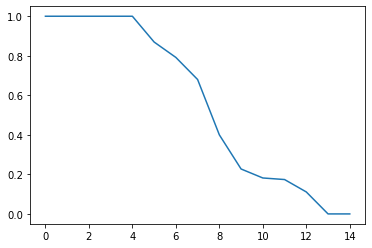

In [5]:
vi_dat = []
for _ in range(0,15):
    vi_dat.append(catch_the_train(_))
plt.plot(range(0,15),vi_dat)

In [7]:
def pre_sum(A):
    cur=0
    res=np.zeros((len(A)))
    for i in range(len(A)):
        cur+=A[i]
        res[i]=cur
    return res

def back_sum(A):
    cur=0
    n=len(A)
    res=np.zeros((n))
    for i in range(n):
        cur+=A[n-i-1]
        res[n-i-1]=cur
    return res

In [8]:
pre_sum(vi_dat)

array([1.        , 2.        , 3.        , 4.        , 5.        ,
       5.86956522, 6.66123188, 7.34123188, 7.74123188, 7.96850461,
       8.15032279, 8.32423584, 8.43534695, 8.43534695, 8.43534695])

In [9]:
back_sum(vi_dat)

array([8.43534695, 7.43534695, 6.43534695, 5.43534695, 4.43534695,
       3.43534695, 2.56578173, 1.77411506, 1.09411506, 0.69411506,
       0.46684234, 0.28502415, 0.11111111, 0.        , 0.        ])

In [10]:
vi_dat = np.array(vi_dat)
def find_thresh_holding(A,B):
    sumA = np.sum(A)
    sumB = np.sum(B)
    AA = back_sum(A)
    BB = pre_sum(B)
    C = np.zeros((len(A)))
    print(C)
    for i in range(len(A)-1):
        C[i] = (sumA-AA[i+1]+sumB-BB[i])
    for i in range(len(A)-1):
        if(C[i+1]<C[i]):
            return [i,C[i]]

In [11]:
thresh,__ = find_thresh_holding(vi_dat,1-vi_dat)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [12]:
def testt(a):
    if a>thresh:
        print('Ket qua luc 6:{} la tre'.format(30+a))
    else:
        print('Ket qua luc 6:{} la dung gio'.format(30+a))

In [13]:
test = [4,5,6,7,8]
for i in test:
    testt(i)

Ket qua luc 6:34 la dung gio
Ket qua luc 6:35 la dung gio
Ket qua luc 6:36 la dung gio
Ket qua luc 6:37 la dung gio
Ket qua luc 6:38 la tre


## Xây dựng bộ phân lớp trên tập dữ liệu person_data

In [20]:
persons = []
with open('person_data.txt', 'r') as fh:
    for line in fh:
        persons.append(line.strip().split())

In [21]:
firstnames = {}
heights = {}
genders = ['male','female']
for gender in genders:
    firstnames[gender] = [x[0] for x in persons if x[4]==gender]
    heights[gender] = [x[2] for x in persons if x[4]==gender]
    heights[gender] = np.array(heights[gender],np.int)
    
for gender in ('female', 'male'):
    print(gender + ':')
    print(firstnames[gender][:10])
    print(heights[gender][:10])

female:
['Stephanie', 'Cynthia', 'Katherine', 'Elizabeth', 'Carol', 'Christina', 'Beverly', 'Sharon', 'Denise', 'Rebecca']
[149 174 183 138 145 161 179 162 148 196]
male:
['Randy', 'Jessie', 'David', 'Stephen', 'Jerry', 'Billy', 'Earl', 'Todd', 'Martin', 'Kenneth']
[184 175 187 192 204 180 184 174 177 200]


In [33]:
class Feature:
    def __init__(self, data, name=None, bin_width=None):
        self.name = name
        self.bin_width = bin_width
        if bin_width:
            self.min, self.max = min(data), max(data)
            bins = np.arange((self.min // bin_width) * bin_width, (self.max // bin_width) * bin_width, bin_width)
            freq, bins = np.histogram(data, bins)
            self.freq_dict = dict(zip(bins, freq))
            self.freq_sum = sum(freq)
        else:
            self.freq_dict = dict(Counter(data))
            self.freq_sum = sum(self.freq_dict.values())
    
    def frequency(self, value):
        if self .bin_width:
            value = (value // self.bin_width) * self.bin_width
        if value in self.freq_dict:
            return self.freq_dict[value]
        else:
            return 0

In [23]:
fts = {}
for gender in genders:
    fts[gender] = Feature(heights[gender], name=gender, bin_width=5)
    print(gender, fts[gender].freq_dict)

male {155: 1, 160: 5, 165: 4, 170: 6, 175: 7, 180: 5, 185: 8, 190: 8, 195: 2, 200: 3}
female {130: 1, 135: 1, 140: 0, 145: 3, 150: 5, 155: 7, 160: 8, 165: 11, 170: 7, 175: 2, 180: 4, 185: 0}


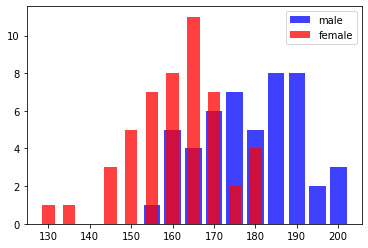

In [24]:
for gender in genders:
    frequencies = list(fts[gender].freq_dict.items())
    frequencies.sort(key=lambda x: x[1])
    X, Y = zip(*frequencies)
    color = 'blue' if gender=='male' else 'red'
    bar_width = 4 if gender=='male' else 3
    plt.bar(X,Y,bar_width, color=color, alpha=0.75, label=gender)
plt.legend(loc='upper right')
plt.show()

In [25]:
class NBclass:
    def __init__(self, name, *features):
        self.features = features
        self.name = name
    
    def probability_value_given_feature(self, feature_value, feature):
        if feature.freq_sum==0:
            return 0
        else:
            return feature.frequency(feature_value) / feature.freq_sum
        

In [26]:
cls = {}
for gender in genders:
    cls[gender] = NBclass(gender, fts[gender])

In [27]:
class Classifier:
    
    def __init__(self, *nbclasses):
        self.nbclasses = nbclasses
        
    def prob(self, *d, best_only=True):
        nbclasses = self.nbclasses
        probability_list = []
        for nbclass in nbclasses:
            ftrs = nbclass.features
            prob = 1
            for i in range(len(ftrs)):
                prob *= nbclass.probability_value_given_feature(d[i], ftrs[i])
            
            probability_list.append((prob, nbclass.name))
        prob_values = [f[0] for f in probability_list]
        prob_sum = sum(prob_values)
        if prob_sum == 0:
            number_classes = len(self.nbclasses)
            p1 = []
            for prob_element in probability_list:
                p1.append(((1/number_classes), prob_element[1]))
            probability_list = p1
        else:
            probability_list = [(p[0] / prob_sum, p[1]) for p in probability_list]
        if best_only:
            return max(probability_list)
        else:
            return probability_list

In [40]:
fts = {}
cls = {}
for gender in genders:
    fts_heights = Feature(heights[gender], name='heights', bin_width=5)
    fts_names = Feature(firstnames[gender], name=gender)
    cls[gender] = NBclass(gender, fts_names, fts_heights)
    
c = Classifier(cls["male"], cls["female"])
testnames = ['Edgar', 'Benjamin', 'Fred', 'Albert', 'Laura', 'Maria', 'Paula', 'Sharon', 'Jessie']
testSet = [('Maria', 140), ('Anthony', 200), ('Anthony', 153), ('Jessie', 188), ('Jessie', 159), ('Jessie', 160)]
for name in testSet:
    print(name, c.prob(*name, best_only=False))

('Maria', 140) [(0.5, 'male'), (0.5, 'female')]
('Anthony', 200) [(1.0, 'male'), (0.0, 'female')]
('Anthony', 153) [(0.5, 'male'), (0.5, 'female')]
('Jessie', 188) [(1.0, 'male'), (0.0, 'female')]
('Jessie', 159) [(0.06666666666666667, 'male'), (0.9333333333333333, 'female')]
('Jessie', 160) [(0.23809523809523817, 'male'), (0.761904761904762, 'female')]


### The name 'Jessie' is an ambiguous name.

In [35]:
ambiguousJessie = [person for person in persons if person[0]=='Jessie']
for i in ambiguousJessie:
    print(i)

['Jessie', 'Morgan', '175', '67.0', 'male']
['Jessie', 'Bell', '165', '65', 'female']
['Jessie', 'Washington', '159', '56', 'female']
['Jessie', 'Davis', '174', '45', 'female']
['Jessie', 'Johnson', '165', '30.0', 'male']
['Jessie', 'Thomas', '168', '69', 'female']


  **3. Tính mean và variance của các vector đặc trưng sau:**

*   List item
*   List item


  
    a. [1 2 4 6 9 10 20 7]
    b. [0 2 4 6 8 … 100]; tất cả các số chẳn từ 0 đến 100.
    c. [1 3 25 … 9801]; tất cả bình phương các số lẻ từ 1 đến 100.
    d. [[2,4], [3,7], [4,6], [5,5], [2,3]]

In [1]:
def mean(x):
  s = 0
  for i in x:
    s += i
  return s/len(x)

def variance(x):
  mu = mean(x)
  s = 0
  for i in x:
    s += (i - mu)**2
  return s/len(x)

In [2]:
import numpy as np

a = [1,2,3,4,6,9,10,20,7]

print("Trung bình của a là:")
print(mean(a))
print("Variance của a là:")
print(variance(a))

Trung bình của a là:
6.888888888888889
Variance của a là:
29.876543209876544


In [3]:
b = list(range(101))
print("Trung bình của b là:")
print(mean(b))
print("Variance của b là:")
print(variance(b))

Trung bình của b là:
50.0
Variance của b là:
850.0


In [4]:
c = list(range(1, 101, 2))
def power(my_list):
    return [ x**2 for x in my_list ]
c = power(c)
print("Trung bình của c là:")
print(mean(c))
print("Variance của c là:")
print(variance(c))

Trung bình của c là:
3333.0
Variance của c là:
8884444.8


In [5]:
d = [[2,4], [3,7], [4,6], [5,5], [2,3]]
print("Trung bình của d là:")
print(np.average(d, axis=0))
print("Variance của d là:")
print(np.var(d, axis=0))

Trung bình của d là:
[3.2 5. ]
Variance của d là:
[1.36 2.  ]


**4. Tính covariance matrix của các vector đặc trưng sau:**

1.   List item
2.   List item


X=[2 3 6 3 7 8] và Y=[5 7 9 6 7 8].

In [6]:
X = [2, 3, 6, 3, 7, 8]
Y = [5, 7, 9, 6, 7, 8]
matrix_1 = [X, Y]
print("Gộp 2 ma trận:")
print(matrix_1)

Gộp 2 ma trận:
[[2, 3, 6, 3, 7, 8], [5, 7, 9, 6, 7, 8]]


In [7]:
print("Tính trung bình ma trận:")
avg_matrix = [sum(matrix_1[0])/len(matrix_1[0]), sum(matrix_1[1])/len(matrix_1[1])]
print(avg_matrix)

Tính trung bình ma trận:
[4.833333333333333, 7.0]


In [8]:
print("Hiệu ma trận ban đầu với trung bình:")
matrix_2 = []
for i in range(len(matrix_1)):
  line = []
  for j in range(len(matrix_1[i])):
    line.append(matrix_1[i][j] - avg_matrix[i])
  matrix_2.append(line)
print(matrix_2)

Hiệu ma trận ban đầu với trung bình:
[[-2.833333333333333, -1.833333333333333, 1.166666666666667, -1.833333333333333, 2.166666666666667, 3.166666666666667], [-2.0, 0.0, 2.0, -1.0, 0.0, 1.0]]


In [9]:
matrix_2 = np.asarray(matrix_2)

In [10]:
N = 6
print("Ma trận hiệp phương sai với N = " + str(N))
print((1/(N-1))*np.dot(matrix_2, matrix_2.T))

Ma trận hiệp phương sai với N = 6
[[6.16666667 2.6       ]
 [2.6        2.        ]]


**5. Tạo hàm mật độ của phân bố Gauss với mean là 5 và variance là 3. Plot hàm kết quả.**

In [11]:
def gauss(x, mean, variance):
  return (1/(math.sqrt(2*math.pi*variance)))*math.exp((-1/2)*((x-mean)/variance)**2)

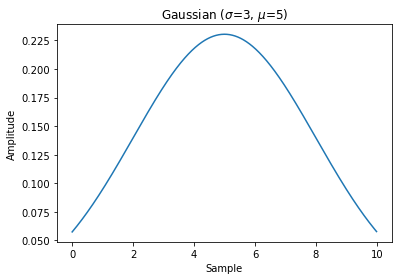

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import math

mean = 5
variance = 3
list_x = np.arange(0, 10, 0.01)
list_y = []
for x in list_x:
  list_y.append(gauss(x, mean, variance))
plt.plot(list_x, list_y)
plt.title(r"Gaussian ($\sigma$="+ str(variance) + ", $\mu$=" + str(mean) + ")")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.show()

**6. Tạo hàm mật độ của phân bố Gauss khác với mean là 2 và variance là 1.5. Plot hàm này trong cùng cửa sổ với hàm được tạo ra ở câu 3. Cho nhận xét.**

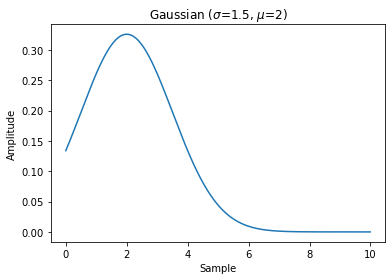

In [13]:
mean = 2
variance = 1.5
list_x = np.arange(0, 10, 0.01)
list_y = []
for x in list_x:
  list_y.append(gauss(x, mean, variance))
plt.plot(list_x, list_y)
plt.title(r"Gaussian ($\sigma$="+ str(variance) + ", $\mu$=" + str(mean) + ")")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.show()

Nhận xét: biểu đồ bị lệch sang trái so với biểu đồ có mean = 3 và variance = 5

**7. Tạo hàm mật độ phân bố Gauss 2 chiều với mean [1 3] và variance [2 2]. Plot hàm này trên lưới [-10 10] x [-10 10] và tính khoảng cách Mahalanobis đối với các mẫu [0 0], [3 4], và [1 2].**

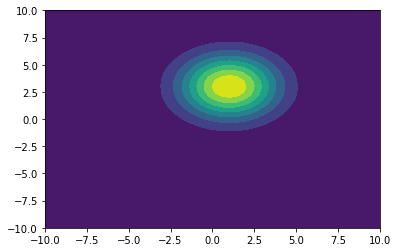

In [16]:
import numpy as np

def gaus2d(x=0, y=0, mx=0, my=0, sx=1, sy=1):
    return 1. / (2. * np.pi * sx * sy) * np.exp(-((x - mx)**2. / (2. * sx**2.) + (y - my)**2. / (2. * sy**2.)))

x = np.linspace(-10, 10)
y = np.linspace(-10, 10)
x, y = np.meshgrid(x, y)
z = gaus2d(x, y, 1, 3, 2, 2)
plt.contourf(x,y,z)
plt.show()

In [17]:
sample_1 = [0,0]
list_x1 = []
for i in range(50):
  list_x1.append(sample_1)
m1 = np.asarray(list_x1)
print("Khoảng cách mahalanobis của điểm [0,0]:")
print(np.dot(np.dot(m1.T,np.cov(z)), m1))
print()

sample_1 = [3,4]
list_x1 = []
for i in range(50):
  list_x1.append(sample_1)
m1 = np.asarray(list_x1)
print("Khoảng cách mahalanobis của điểm [3,4]:")
print(np.dot(np.dot(m1.T,np.cov(z)), m1))
print()

sample_1 = [1,2]
list_x1 = []
for i in range(50):
  list_x1.append(sample_1)
m1 = np.asarray(list_x1)
print("Khoảng cách mahalanobis của điểm [1,2]:")
print(np.dot(np.dot(m1.T,np.cov(z)), m1))
print()

Khoảng cách mahalanobis của điểm [0,0]:
[[0. 0.]
 [0. 0.]]

Khoảng cách mahalanobis của điểm [3,4]:
[[0.24855543 0.33140724]
 [0.33140724 0.44187632]]

Khoảng cách mahalanobis của điểm [1,2]:
[[0.02761727 0.05523454]
 [0.05523454 0.11046908]]



  **8. Xây dựng bộ classifier sử dụng 1 đặc trưng có sẳn.**

*   List item
*   List item



▪ Load data:

    ◦ Load 2 file tương ứng cho 2 class là: class1.txt và class2.txt.
    ◦ Cho biết số mẫu và số đặc trưng của mỗi class.
    ◦ Tính mean, variance, và covariance của các vector đặc trưng.
    ◦ Trích chọn 1 đặc trưng. 

In [24]:
def covariance(x):
  N = len(x)
  TB = mean(x)
  M = []
  for i in x:
    M.append(i - TB)
  D = np.asarray(M)
  return  (1/(N-1))*D*D.T

In [26]:
datContent = [i.strip().split() for i in open("twoclass.dat", "r").readlines()]
print("Số mẫu là: " + str(len(datContent)))
print("Số đặc trưng của mỗi class là: " + str(len(datContent[0][:-2])))
for i in range(len(datContent[0][:-2])):
  print("Trung bình của đặc trưng " + str(i+1) + " là: " + str(mean([float(row[i]) for row in datContent])))
  print("Phương sai của đặc trưng " + str(i+1) + " là: " + str(variance([float(row[i]) for row in datContent])))
  print("Hiệp phương sai của đặc trưng " + str(i+1) + " là: " + str(np.cov([float(row[i]) for row in datContent])))
  print()
# Chọn đặc trưng 1
feature_1 = [float(row[0]) for row in datContent]
feature_2 = [float(row[1]) for row in datContent]
feature_3 = [float(row[2]) for row in datContent]
feature_4 = [float(row[3]) for row in datContent]
class_1 = [int(row[4]) for row in datContent]

# Tạo list index
idx = np.arange(0, len(feature_1))
# Ranđom lại list index
np.random.shuffle(idx)
# Lấy ra phân nửa list index đã random
idx_train = idx[:len(feature_1)//2]
idx_test = idx[len(feature_1)//2:]

# Tách tập train
feature_1_train = [feature_1[i] for i in idx_train]
feature_2_train = [feature_2[i] for i in idx_train]
feature_3_train = [feature_3[i] for i in idx_train]
feature_4_train = [feature_4[i] for i in idx_train]

class_train = [class_1[i] for i in idx_train]

# Tách tập test
feature_1_test = [feature_1[i] for i in idx_test]
feature_2_test = [feature_2[i] for i in idx_test]
feature_3_test = [feature_3[i] for i in idx_test]
feature_4_test = [feature_4[i] for i in idx_test]

class_test = [class_1[i] for i in idx_test]

Số mẫu là: 242
Số đặc trưng của mỗi class là: 4


TypeError: 'int' object is not callable